# Aprendizaje Automático
## Cuarta práctica
---
Para la cuarta práctica del curso de aprendizaje automático, se utilizará el mismo conjunto de datos que pertenece al repositorio especial de Machine Learning de la [UCI](https://archive.ics.uci.edu/ml). El conjunto de datos se llama "Adult" y toda la información correspondiente al mismo se encuentra [aquí](https://archive.ics.uci.edu/ml/datasets/Adult).

---
### Perceptrones Multicapa, Redes LSTM y Redes Convolucionales

---
Dado que en principio se requieren cargar los datos del conjunto de datos Adult, es necesario cargar los datos tanto de entrenamiento como de prueba del conjunto de datos. __Se utilizó Sci-kit para MLP y keras (tensorflow) para LSTM__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import neighbors
import io
import requests

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
ds_ = pd.read_csv(url, header=None, na_values=" ?")
ds = ds_.dropna()
ds = ds.rename(columns = {ds.columns.values[14]:'C'}) # Cambiamos el nombre de la última columna por "C" de clase
le = preprocessing.LabelEncoder() # Label encoder de sci-kit
ds = ds.apply(le.fit_transform) # Convertimos los valores de object a int
class_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country']

In [3]:
urltest = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
test_ = pd.read_csv(urltest, skiprows=1, header=None, na_values=" ?")
test = test_.dropna()
test = test.rename(columns = {test.columns.values[14]:'C'}) # Cambiamos el nombre de la última columna por "C" de clases = test.apply(le.fit_transform) # Convertimos los valores de object a int
test = test.apply(le.fit_transform) # Convertimos los valores de object a int

En este taller se debe extraer aleatoriamente un 10% de los datos del conjunto de entrenamiento. Este subconjunto constituirá el conjunto de validación, que se usará para estimar los valores de los parámetros en las técnicas que así lo requieran. Todas las técnicas deberán entrenarse con el mismo conjunto de entrenamiento para que sea posible comparar sus desempeños. En la siguiente celda, se divide el conjunto de entrenamiento como se enunció. La técnica de Perceptrones Multicapas se puede trabajar con la librería Sklearn, pero las redes LSTM y Convolucionales, requieren del uso de la librería de Google, Tensorflow.

In [4]:
x_train = ds.drop('C', axis = 1)
y_train = ds['C']

x_test = test.drop('C', axis = 1)
y_test = test['C']

from collections import Counter

x_strainval, x_stestval, y_strainval, y_stestval = train_test_split(x_train, y_train, test_size = 0.10)
print('Original dataset shape trainval {}'.format(Counter(y_strainval)))
print('Original dataset shape testval {}'.format(Counter(y_stestval)))

Original dataset shape trainval Counter({0: 20389, 1: 6756})
Original dataset shape testval Counter({0: 2265, 1: 752})


### Perceptrones Multicapa

---
En la siguiente celda, se entrenan 2 Perceptrones Multicapa con el subconjunto de validación. Se estimó la arquitectura más eficiente, como también la tasa de aprendizaje que arrojaba mejores resultados.


############## Accuracy MLP ##################
0.7905203844879019
[[2210   55]
 [ 577  175]]


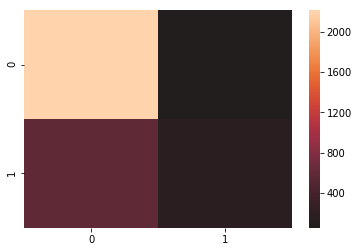


############## Accuracy MLP ##################
0.7795823665893271
[[2124  141]
 [ 524  228]]


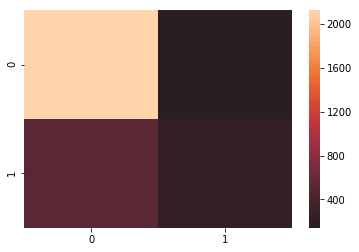

In [5]:
#### ensayar diferentes opciones de arquitectura y estimar la tasa de aprendizaje

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

clf = MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13, 13), 
                    random_state=42, learning_rate_init=0.0016)
clf.fit(x_strainval, y_strainval)

clf_predict = clf.predict(x_stestval)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_stestval, clf_predict))
print(metrics.confusion_matrix(y_stestval, clf_predict))

sns.heatmap(metrics.confusion_matrix(y_stestval, clf_predict), center=True)
plt.show()

##########################################################################

clf2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), 
                    random_state=42, learning_rate_init=0.001)
clf2.fit(x_strainval, y_strainval)

clf2_predict = clf2.predict(x_stestval)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_stestval, clf2_predict))
print(metrics.confusion_matrix(y_stestval, clf2_predict))

sns.heatmap(metrics.confusion_matrix(y_stestval, clf2_predict), center=True)
plt.show()

Ahora, se entrena el perceptrón muticapa elegido con el conjunto de prueba original


############## Accuracy MLP ##################
0.802523240371846
[[10953   407]
 [ 2567  1133]]


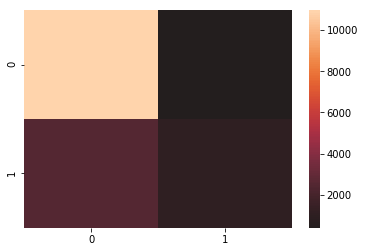

In [6]:
clf.fit(x_train, y_train)

clf_predict2 = clf.predict(x_test)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_test, clf_predict2))
print(metrics.confusion_matrix(y_test, clf_predict2))

sns.heatmap(metrics.confusion_matrix(y_test, clf_predict2), center=True)
plt.show()

### Redes LSTM

---
Para trabajar con las redes LSTM, se utilizó el modulo Keras de Tensorflow.

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

/home/mario/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Se crea el modelo de la red y se entrena una LSTM con los datos del corpus, determinando el número de epochs y batch_size.

In [16]:
evl = 14 # tamaño del vector de entrada
model = Sequential()
model.add(Embedding(25000, evl , input_length=14))
model.add(LSTM(2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=3, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 14, 14)            350000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 2)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 350,139
Trainable params: 350,139
Non-trainable params: 0
_________________________________________________________________
None


/home/mario/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/mario/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
30162/30162 [==============================] - 8s 271us/step - loss: 0.5627 - acc: 0.7297
Epoch 2/3
30162/30162 [==============================] - 7s 234us/step - loss: 0.4191 - acc: 0.8180
Epoch 3/3
30162/30162 [==============================] - 7s 236us/step - loss: 0.3566 - acc: 0.8460


Luego de entrenar la red LSTM, se evalua el desempeño de la misma con la correspondiente Matriz de Confusión y Accuracy.

In [17]:
# Evaluación de la red 

predictions = model.predict(x_test, batch_size= 64)

# ---
rounded = [round(x[0]) for x in predictions]

y_pred = pd.DataFrame(rounded)
y_pred = y_pred.iloc[:, 0]

print('########################')

print( "Confusion Matrix \n")

print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), '\n')

print('########################')
Acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.4f\n'  % (Acc*100) )

########################
Confusion Matrix 

Predicted   0.0   1.0
Actual               
0          8918  1578
1          2892   551 

########################
Accuracy: 81.2417

